# WeGo Brake it Easy CLEANING

## DIRECTIONS: 
1) Make sure this notebook is in the "notebooks" folder within the wego-brake-it-easy root directory, and your CSV is in the "data" folder within that same root. Read_csv path should be "../data/Headway Data, 8-1-2023 to 9-30-2023.csv"
2) Open this notebook and run all cells.

## EXERCISE README

WeGo Public Transit is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

The data for this project can be downloaded from here: <https://drive.google.com/file/d/1iM4WjC9k3EXHPNc6q4AwDh_MEIpXvfMD/view>.

In this project, you'll be analyzing the on-time performance of buses to look for patterns and try to identify correlations to controllable or external factors.

The main variable you will be studying in this project is adherence, which compares the actual departure time to the scheduled time and is included in the ADHERENCE column. A negative adherence value means that a bus left a time point late and a positive adherence indicates that the bus left the time point early. Buses with adherence values beyond negative 6 are generally considered late and beyond positive 1 are considered early. However, there is some additional logic where the staff applies waivers to allow early departures, such as an express bus that has already picked up everyone at a park-and-ride lot and is only dropping people off at the remaining stops, and also allows for early timepoint records for all records where TRIP_EDGE = 2 (end of trip), since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. Note: When determining whether a bus is early or late, it is advised that you use the 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', and 'ADJUSTED_ONTIME_COUNT' columns in order to account for the adjustments.

**Goals of this project:**

1) What is the overall on-time performance, and what do the overall distribution of adherence look like?
2) How does direction of travel, route, or location affect the on-time performance?
3) How does time of day or day of week affect on-time performance?
4) How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.
5) Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

**Stretch Goals:**

6) How much impact does being late or too spaced out at the first stop have downstream?
7) What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?
8) What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?
9) Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

## EXERCISE Data Dictionary

A trip is defined as one run of the vehicle from one end of the route to another in one direction. Two trips = one round trip. The TRIP_ID field provides a unique indicator for each trip.

A trip has more stops than are recorded in this data. The stops with data are called Time Points, and these are the points along the route with specific scheduled times that bus operators must adhere to (i.e. they are not allowed to depart early from these stops). There are many intermediate stops in between, but we generally focus on the Time Points as a meaningful subset. All stops can be included, but the datasets become quite large. The values are captured by our vehicle tracking system, which uses a combination of GPS and an onboard computer with login information entered by the driver to match the vehicle to a given scheduled trip, route, and direction.

**Dataset Columns:**  
CALENDAR_ID: Identifier for the date  
SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
ADHERENCE_ID: Unique identifier for each record  
DATE: Trip date  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pike
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is on  
OPERATOR: Indicates the operator (driver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from downtown  
TIME_POINT_ABBR: Identifies the time point of the record.  
ROUTE_STOP_SEQUENCE: Identifies the stop point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)  
LATITUDE/LONGITUDE: Location in lat/long  
SCHEDULED_TIME: scheduled time  
ACTUAL_ARRIVAL_TIME: actual arrival time  
ACTUAL_DEPARTURE_TIME: actual departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled time for that stop  
ACTUAL_HDWY: Actual headway; Notably, does not exclude overloads, as we want to know about them for actual headway performance  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  
ADJUSTED_EARLY_COUNT: 	
ADJUSTED_LATE_COUNT: 	
ADJUSTED_ONTIME_COUNT: 
STOP_CANCELLED:	flags whether a crossing was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new driver on the bus/block	  
BLOCK_STOP_ORDER:   
DWELL_IN_MINS: Actual Departure Time - Actual Arrival Time (in minutes)
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 

## EXERCISE WeGo Data Introduction

In [2]:
import pandas as pd, numpy as np
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [4]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [5]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [6]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [10]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [11]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


## Step 0) Setup and Parsing

In [12]:
# =========================
# 0) Setup & Parsing (Idempotent, safe to re-run)
# =========================

# 0.1 Imports, paths & column normalization
# - What: Import deps, set output path, and normalize key columns to consistent dtypes.
# - Why: Prevent subtle bugs (e.g., "1" vs 1), ensure stable groupbys/joins, and consistent exports.
# - How: Use pandas/numpy + to_numeric/coerce; cast ints/bools where available; centralize out_dir.
# - Supports: Baseline for all tasks; enables clean downstream analyses (Q1–Q9).

import pandas as pd, numpy as np
from pathlib import Path

out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)

# Defensive: only normalize columns that exist
if "SERVICE_ABBR" in wego.columns:
    wego["SERVICE_ABBR"] = pd.to_numeric(wego["SERVICE_ABBR"], errors="coerce")
if "ROUTE_ABBR" in wego.columns:
    wego["ROUTE_ABBR"] = pd.to_numeric(wego["ROUTE_ABBR"], errors="coerce").astype("Int64")
if "STOP_CANCELLED" in wego.columns:
    wego["STOP_CANCELLED"] = pd.to_numeric(wego["STOP_CANCELLED"], errors="coerce").fillna(0).astype(int)
if "TRIP_ID" in wego.columns:
    wego["TRIP_ID"] = pd.to_numeric(wego["TRIP_ID"], errors="coerce").astype("Int64")

# Keep a clean working copy (never mutate original reference)
wego = wego.copy()


# 0.2 Datetimes & trip key
# - What: Parse time columns and build a unique per-day trip identifier.
# - Why: Enable time slicing (hour/DOW) and trip-level analyses (first stop, layover, progression).
# - How: pd.to_datetime(..., errors='coerce'); concat CALENDAR_ID + TRIP_ID → trip_key with “UNK” fallback.
# - Supports: Q3 (time patterns), Q6–Q8 (trip-level/stability over distance/time).

for c in ["DATE","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"]:
    if c in wego.columns:
        wego[c] = pd.to_datetime(wego[c], errors="coerce")

# Collision-proof trip_key (avoid 'nan' fragments)
wego["trip_key"] = (
    wego.get("CALENDAR_ID", pd.Series(index=wego.index, dtype="Int64")).astype("Int64").astype(str).fillna("UNK")
    + "_" +
    wego.get("TRIP_ID", pd.Series(index=wego.index, dtype="Int64")).astype("Int64").astype(str).fillna("UNK")
)


# 0.3 Time & service features
# - What: Engineer DOW, hour, peak/off-peak, and service_type labels.
# - Why: Reveal rush-hour and program schedule effects on performance.
# - How: Use .dt accessors and simple maps; define peak windows as constants; cast to category for speed.
# - Supports: Q3 (time-of-day / day-of-week), Q5/Q9 (when headways deviate).

PEAK_AM = (7, 9)
PEAK_PM = (16, 18)

wego["dow"]  = wego["DATE"].dt.day_name()
wego["hour"] = wego["SCHEDULED_TIME"].dt.hour
wego["peak"] = np.where(
    wego["hour"].between(*PEAK_AM) | wego["hour"].between(*PEAK_PM),
    "Peak", "Off-peak"
)

service_map = {1:"Weekday", 2:"Saturday", 3:"Sunday"}
wego["service_type"] = (
    wego["SERVICE_ABBR"].map(service_map).fillna("Other")
    if "SERVICE_ABBR" in wego.columns else "Other"
)

for c in ["ROUTE_DIRECTION_NAME","dow","service_type","peak"]:
    if c in wego.columns:
        wego[c] = wego[c].astype("category")


# 0.4 Names: route_name & timepoint_name via GTFS (with robust fallbacks)
# - What: Add human-readable names for routes and timepoints; enrich for maps/exports.
# - Why: Improve interpretability (stakeholders read names, not codes); unlock better visuals.
# - How: Map ROUTE_ABBR via dict; try GTFS stops (stop_code match), then NN fallback (≤100m), else revert to abbr.
# - Supports: Q2 (route/location effects), Q5/Q9 (headway by route/stop), and readable KPIs (Q1).

route_names = {
    3:'West End', 7:'Hillsboro', 22:'Bordeaux', 23:'Dickerson Pike',
    50:'Charlotte Pike', 52:'Nolensville Pike', 55:'Murfreesboro Pike', 56:'Gallatin Pike'
}
wego["route_name"] = (
    wego.get("ROUTE_ABBR", pd.Series(index=wego.index, dtype="Int64")).astype("Int64").map(route_names)
    .fillna(wego.get("ROUTE_ABBR", pd.Series(index=wego.index, dtype="Int64")).astype(str))
)

# Optional seed dictionary for known timepoints (edit/extend as you confirm)
timepoint_seeds = {
    # "DCSCC": "Downtown Transit Center",
    # "MXDONEL": "Donelson Pike @ ...",
}

if "timepoint_name" not in wego.columns:
    wego["timepoint_name"] = pd.NA
if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].map(timepoint_seeds))

def _gtfs_stops_or_none(url="https://www.wegotransit.com/GoogleExport/google_transit.zip"):
    try:
        import io, zipfile, requests
        r = requests.get(url, timeout=60)
        r.raise_for_status()
        zf = zipfile.ZipFile(io.BytesIO(r.content))
        stops = pd.read_csv(zf.open("stops.txt"))
        return stops[["stop_id","stop_code","stop_name","stop_lat","stop_lon"]].copy()
    except Exception:
        return None

stops = _gtfs_stops_or_none()
if stops is not None and "TIME_POINT_ABBR" in wego.columns:
    wego["TIME_POINT_ABBR_str"] = wego["TIME_POINT_ABBR"].astype(str)
    stops["stop_code_str"] = stops["stop_code"].astype(str)

    # Direct stop_code match
    w1 = wego.merge(
        stops[["stop_code_str","stop_name"]],
        left_on="TIME_POINT_ABBR_str", right_on="stop_code_str", how="left"
    )
    wego["timepoint_name"] = wego["timepoint_name"].fillna(w1["stop_name"])

    # Nearest neighbor fallback (≤100 m) if LAT/LON available
    need_nn = (
        wego["timepoint_name"].isna()
        & wego.get("LATITUDE", pd.Series(index=wego.index)).notna()
        & wego.get("LONGITUDE", pd.Series(index=wego.index)).notna()
    )
    if need_nn.any():
        try:
            from scipy.spatial import cKDTree
            LAT_M = 111_132.0
            LON_M = 111_132.0 * np.cos(np.deg2rad(36.1627))  # Nashville-ish
            stops_xy = np.c_[stops["stop_lat"]*LAT_M, stops["stop_lon"]*LON_M]
            tree = cKDTree(stops_xy)

            wego_nn = wego.loc[need_nn, ["TIME_POINT_ABBR","LATITUDE","LONGITUDE"]].dropna()
            wego_xy = np.c_[wego_nn["LATITUDE"]*LAT_M, wego_nn["LONGITUDE"]*LON_M]
            dist, idx = tree.query(wego_xy, k=1)

            nn = wego_nn.assign(
                nearest_stop_name = stops.iloc[idx]["stop_name"].values,
                nn_dist_m = dist
            )
            nn_good = nn.loc[nn["nn_dist_m"] <= 100, ["TIME_POINT_ABBR","nearest_stop_name"]]
            tp_lookup = (
                nn_good.groupby("TIME_POINT_ABBR")["nearest_stop_name"]
                       .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
            )
            fill_mask = wego["timepoint_name"].isna()
            wego.loc[fill_mask, "timepoint_name"] = wego.loc[fill_mask, "TIME_POINT_ABBR"].map(tp_lookup)
        except Exception:
            # Rounded coordinate join fallback
            if {"LATITUDE","LONGITUDE"}.issubset(wego.columns):
                wego["lat_r"] = wego["LATITUDE"].round(4)
                wego["lon_r"] = wego["LONGITUDE"].round(4)
                stops["lat_r"] = stops["stop_lat"].round(4)
                stops["lon_r"] = stops["stop_lon"].round(4)
                w2 = wego.merge(stops[["lat_r","lon_r","stop_name"]], on=["lat_r","lon_r"], how="left")
                fill_mask = wego["timepoint_name"].isna()
                wego.loc[fill_mask, "timepoint_name"] = w2.loc[fill_mask, "stop_name"]

# Final fallback for readability
if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"])


# 0.5 Headway features, OTP-ready filtering, policy flags & labels
# - What: Compute headway % deviation; create OTP-ready view; apply waiver logic; label classes.
# - Why: Produce accurate, policy-aligned KPIs and consistent analysis rows.
# - How: Guard against zero headway; filter missing/cancelled rows; override TRIP_EDGE==2 as on-time; derive otp_label.
# - Supports: Q1 (OTP baseline), Q2–Q5 (route/time/operator effects & correlations), Q6–Q8 (trip-level).

if {"HDWY_DEV","SCHEDULED_HDWY"}.issubset(wego.columns):
    valid_hdwy = (wego["SCHEDULED_HDWY"] > 0)
    wego["hdwy_pct_dev"] = np.where(valid_hdwy, wego["HDWY_DEV"]/wego["SCHEDULED_HDWY"], np.nan)
    wego["hdwy_pct_dev_clip"] = wego["hdwy_pct_dev"].clip(0, 3)  # 0–300% for visuals
else:
    wego["hdwy_pct_dev"] = np.nan
    wego["hdwy_pct_dev_clip"] = np.nan

# Build OTP-ready dataset (keep full population separately for reference)
wego_all = wego
mask_keep = (
    wego_all.get("SCHEDULED_TIME", pd.Series(index=wego_all.index)).notna()
    & wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series(index=wego_all.index)).notna()
    & (pd.to_numeric(wego_all.get("STOP_CANCELLED", pd.Series(index=wego_all.index, dtype=int)), errors="coerce") != 1)
)
wego_otp = wego_all.loc[mask_keep].copy()

# Adjusted flags (mutually exclusive) and policy override at trip end
for col, src in [("is_early","ADJUSTED_EARLY_COUNT"),
                 ("is_late","ADJUSTED_LATE_COUNT"),
                 ("is_ontime","ADJUSTED_ONTIME_COUNT")]:
    if src in wego_otp.columns:
        wego_otp[col] = (wego_otp[src] > 0).astype(int)
    else:
        wego_otp[col] = 0

if "TRIP_EDGE" in wego_otp.columns:
    at_end = wego_otp["TRIP_EDGE"].eq(2)
    wego_otp.loc[at_end, ["is_early","is_late","is_ontime"]] = (0,0,1)

# Safety: no row should be both early and late
assert ((wego_otp["is_early"] + wego_otp["is_late"]) <= 1).all(), "Row cannot be both early and late"

# Label and clip (for visuals only)
wego_otp["otp_label"] = np.select(
    [wego_otp["is_ontime"].eq(1), wego_otp["is_late"].eq(1), wego_otp["is_early"].eq(1)],
    ["On-time","Late","Early"], default="Unclassified"
)
if "ADHERENCE" in wego_otp.columns:
    wego_otp["ADHERENCE_clip"] = wego_otp["ADHERENCE"].clip(-30, 15)

# Ensure readable labels are filled in OTP view
for col, fb in [("route_name","ROUTE_ABBR"), ("timepoint_name","TIME_POINT_ABBR")]:
    if col in wego_otp.columns and fb in wego_otp.columns:
        wego_otp[col] = wego_otp[col].fillna(wego_otp[fb].astype(str))

# Simple data-quality report
dq = {
    "rows_total": len(wego_all),
    "rows_otp_kept": len(wego_otp),
    "pct_kept": f"{len(wego_otp)/max(1,len(wego_all)):.1%}",
    "missing_sched": int(wego_all.get("SCHEDULED_TIME", pd.Series()).isna().sum()),
    "missing_act_dep": int(wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series()).isna().sum()),
    "cancelled": int((wego_all.get("STOP_CANCELLED", pd.Series(dtype=int))==1).sum()),
}
print("Data Quality:", dq)


# 0.6 Exports (with route_name & timepoint_name)
# - What: Write shareable CSVs for by-route KPIs, trip summaries, and timepoint hotspots; plus enriched dumps.
# - Why: Provide portable deliverables for stakeholders and QA outside the notebook.
# - How: Group with wego_otp (clean rows), attach readable names, and save to ../data/ with UTF-8 BOM for Excel.
# - Supports: Q1 (overall OTP), Q2/Q4 (route/operator), Q5/Q9 (headway), and stretch goals (Q6–Q8).

# A) By Route
if {"ROUTE_ABBR","is_ontime"}.issubset(wego_otp.columns):
    wego_by_route = (
        wego_otp.groupby("ROUTE_ABBR", as_index=False)
                .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
    )
    rn_map = wego_otp.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
    wego_by_route["route_name"] = rn_map.reindex(wego_by_route["ROUTE_ABBR"]).values
    wego_by_route = wego_by_route.sort_values(["otp","n"], ascending=[False, False])
    wego_by_route.to_csv(out_dir / "wego_by_route.csv", index=False, encoding="utf-8-sig")

# B) Trip Summary (enhanced): add service_type and overload_seen
if "trip_key" in wego_otp.columns:
    trip_summary = (
        wego_otp.groupby("trip_key", observed=True)
        .agg(
            ROUTE_ABBR=("ROUTE_ABBR","first"),
            route_dir=("ROUTE_DIRECTION_NAME","first"),
            service=("service_type","first"),
            start_time=("SCHEDULED_TIME","min"),
            end_time=("SCHEDULED_TIME","max"),
            n_tp=("is_ontime","size"),
            otp_rate=("is_ontime","mean"),
            mean_adh=("ADHERENCE","mean"),
            std_adh=("ADHERENCE","std"),
            hdwy_std=("hdwy_pct_dev","std"),
            overload_seen=("OVERLOAD_ID",
                           lambda s: ((pd.to_numeric(s, errors="coerce").fillna(0)) != 0).any())
            if "OVERLOAD_ID" in wego_otp.columns else (lambda s: False)
        )
        .reset_index()
    )
    trip_summary["route_name"] = trip_summary["ROUTE_ABBR"].map(route_names)\
                                        .fillna(trip_summary["ROUTE_ABBR"].astype(str))
    trip_summary.to_csv(out_dir / "wego_trip_summary.csv", index=False, encoding="utf-8-sig")

# C) Timepoint Hotspots (late/early/otp + n, with names)
needed_cols = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if needed_cols.issubset(wego_otp.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    dfg = wego_otp.loc[:, keys + ["is_late","is_early","is_ontime","route_name","timepoint_name"]].copy()

    # Stable dtypes for keys
    dfg["ROUTE_ABBR"] = pd.to_numeric(dfg["ROUTE_ABBR"], errors="coerce").astype("Int64")
    dfg["ROUTE_DIRECTION_NAME"] = dfg["ROUTE_DIRECTION_NAME"].astype(str)
    dfg["TIME_POINT_ABBR"] = dfg["TIME_POINT_ABBR"].astype(str)

    tp_perf = (
        dfg.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )

    # Attach readable names safely
    tp_perf["route_name"] = tp_perf["ROUTE_ABBR"].map(route_names)\
                               .fillna(tp_perf["ROUTE_ABBR"].astype(str))
    tp_name_map = (
        wego_otp.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                .dropna(subset=["timepoint_name"])
                .drop_duplicates(subset=["TIME_POINT_ABBR"])
                .set_index("TIME_POINT_ABBR")["timepoint_name"]
    )
    tp_perf["timepoint_name"] = tp_perf["TIME_POINT_ABBR"].map(tp_name_map)\
                                   .fillna(tp_perf["TIME_POINT_ABBR"])

    tp_perf = tp_perf.sort_values(["late_rate","n"], ascending=[False, False])
    tp_perf.to_csv(out_dir / "wego_timepoint_hotspots.csv", index=False, encoding="utf-8-sig")

# D) Enriched full-population and OTP-ready dumps for Excel
wego_all.to_csv(out_dir / "wego_enriched_full.csv", index=False, encoding="utf-8-sig")
wego_otp.to_csv(out_dir / "wego_otp_enriched_full.csv", index=False, encoding="utf-8-sig")

print("Exports complete → ../data/:")
print(" - wego_by_route.csv")
print(" - wego_trip_summary.csv")
print(" - wego_timepoint_hotspots.csv")
print(" - wego_enriched_full.csv")
print(" - wego_otp_enriched_full.csv")

# =========================
# 0.7) Build in-memory DataFrames for all exports (and keep them handy)
# =========================

# A) Full enriched population (no OTP filter)
# - What: Provide a complete, enriched view with all engineered columns.
# - Why: Allow auditing and ad-hoc slicing without re-running Step 0.
# - How: Alias the working full DataFrame to a clearly named variable.
# - Supports: All downstream checks; not for KPIs (Q1–Q9).
df_full_enriched = wego.copy()

# B) OTP-ready enriched subset (policy-aligned)
# - What: Canonical dataset for KPI/answers, honoring WeGo OTP rules.
# - Why: Ensure all Q1–Q5 metrics reflect adjusted counts and waivers.
# - How: Use wego_otp created in Step 0.5 and alias for clarity.
# - Supports: Q1–Q5 primarily; foundations for Q6–Q9.
df_otp_enriched = wego_otp.copy()

# C) By-route KPI table
# - What: One row per route with OTP rate and sample size.
# - Why: Simple ranking and comparisons across routes.
# - How: Group df_otp_enriched by ROUTE_ABBR → mean(size); attach route_name.
# - Supports: Q1 (overall OTP), Q2 (route effects), context for Q3/Q5/Q9.
df_by_route = (
    df_otp_enriched.groupby("ROUTE_ABBR", as_index=False)
                   .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
)
# Stable route_name mapping from df_otp_enriched (handles missing nicely)
route_name_map = (df_otp_enriched.drop_duplicates("ROUTE_ABBR")
                                 .set_index("ROUTE_ABBR")["route_name"])
df_by_route["route_name"] = route_name_map.reindex(df_by_route["ROUTE_ABBR"]).values
df_by_route = df_by_route.sort_values(["otp","n"], ascending=[False, False]).reset_index(drop=True)

# D) Trip-level summary (one per trip_key)
# - What: Trip start/end, OTP %, adherence stats, headway stability, overload flag.
# - Why: Power analyses of first-stop impact, layover/stability, distance/time effects.
# - How: Group df_otp_enriched by trip_key and compute aggregates; attach route_name.
# - Supports: Q6, Q7, Q8 (and context for others).
df_trip_summary = (
    df_otp_enriched.groupby("trip_key", observed=True)
      .agg(
          ROUTE_ABBR=("ROUTE_ABBR","first"),
          route_dir=("ROUTE_DIRECTION_NAME","first"),
          service=("service_type","first"),
          start_time=("SCHEDULED_TIME","min"),
          end_time=("SCHEDULED_TIME","max"),
          n_tp=("is_ontime","size"),
          otp_rate=("is_ontime","mean"),
          mean_adh=("ADHERENCE","mean"),
          std_adh=("ADHERENCE","std"),
          hdwy_std=("hdwy_pct_dev","std"),
          overload_seen=("OVERLOAD_ID", lambda s: ((pd.to_numeric(s, errors="coerce").fillna(0)) != 0).any())
            if "OVERLOAD_ID" in df_otp_enriched.columns else (lambda s: False)
      )
      .reset_index()
)
df_trip_summary["route_name"] = df_trip_summary["ROUTE_ABBR"].map(
    df_otp_enriched.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
).fillna(df_trip_summary["ROUTE_ABBR"].astype(str))

# E) Timepoint hotspots (route × direction × timepoint)
# - What: Stop-level late/early/OTP rates with sample size, labeled for readability.
# - Why: Identify where interventions (scheduling/ops) could target.
# - How: Group df_otp_enriched, compute rates; map route_name and timepoint_name.
# - Supports: Q2, Q6–Q9, especially hotspot and location effects.
_needed = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if _needed.issubset(df_otp_enriched.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    dfg = df_otp_enriched.loc[:, keys + ["is_late","is_early","is_ontime","route_name","timepoint_name"]].copy()

    # Ensure stable dtypes for groupby keys
    dfg["ROUTE_ABBR"] = pd.to_numeric(dfg["ROUTE_ABBR"], errors="coerce").astype("Int64")
    dfg["ROUTE_DIRECTION_NAME"] = dfg["ROUTE_DIRECTION_NAME"].astype(str)
    dfg["TIME_POINT_ABBR"] = dfg["TIME_POINT_ABBR"].astype(str)

    df_timepoint_hotspots = (
        dfg.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )
    # Attach readable labels safely
    rn_map = df_otp_enriched.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
    tp_map = (df_otp_enriched.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                             .dropna(subset=["timepoint_name"])
                             .drop_duplicates("TIME_POINT_ABBR")
                             .set_index("TIME_POINT_ABBR")["timepoint_name"])
    df_timepoint_hotspots["route_name"] = df_timepoint_hotspots["ROUTE_ABBR"].map(rn_map).fillna(
        df_timepoint_hotspots["ROUTE_ABBR"].astype(str)
    )
    df_timepoint_hotspots["timepoint_name"] = df_timepoint_hotspots["TIME_POINT_ABBR"].map(tp_map).fillna(
        df_timepoint_hotspots["TIME_POINT_ABBR"]
    )
    df_timepoint_hotspots = df_timepoint_hotspots.sort_values(["late_rate","n"], ascending=[False, False]).reset_index(drop=True)
else:
    df_timepoint_hotspots = pd.DataFrame(columns=[
        "ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","late_rate","early_rate","otp_rate","n","route_name","timepoint_name"
    ])

# F) Quick integrity printout (so the next analyst knows what’s available)
print(
    "Ready DataFrames:\n"
    f" - df_full_enriched:        {df_full_enriched.shape}\n"
    f" - df_otp_enriched:         {df_otp_enriched.shape}\n"
    f" - df_by_route:             {df_by_route.shape}\n"
    f" - df_trip_summary:         {df_trip_summary.shape}\n"
    f" - df_timepoint_hotspots:   {df_timepoint_hotspots.shape}"
)

# G) (Optional) Round-trip loaders if starting from CSVs
# - What: Helpers to load the exports back as DataFrames in a new session.
# - Why: Enable analysts to begin directly from the CSV outputs.
# - How: Simple pd.read_csv with parse_dates where applicable.
# - Supports: All questions when the pre-processing step is already done.
# def load_exports(base_dir="../data"):
#     import pandas as pd
#     by_route = pd.read_csv(f"{base_dir}/wego_by_route.csv")
#     trip_summary = pd.read_csv(
#         f"{base_dir}/wego_trip_summary.csv",
#         parse_dates=["start_time","end_time"]
#     )
#     tp_hotspots = pd.read_csv(f"{base_dir}/wego_timepoint_hotspots.csv")
#     wego_full = pd.read_csv(f"{base_dir}/wego_enriched_full.csv", parse_dates=["DATE","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"])
#     wego_otp  = pd.read_csv(f"{base_dir}/wego_otp_enriched_full.csv", parse_dates=["DATE","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"])
#     return wego_full, wego_otp, by_route, trip_summary, tp_hotspots

# =========================
# 0.8) Canonical Aliases for Analysis (read-only intent)
# =========================

# Bind aliases to the official in-memory DataFrames created in Step 0.7
DF_FULL  = df_full_enriched          # all rows (no OTP filter) → auditing/sanity checks
DF_OTP   = df_otp_enriched           # policy-aligned rows → use for KPIs and most answers
BY_ROUTE = df_by_route               # pre-aggregated route KPIs
TRIPS    = df_trip_summary           # one row per trip
TP_HOT   = df_timepoint_hotspots     # route×dir×timepoint rollups

# (Optional) quick sanity check — prints shapes so analysts know what’s available
print(
    "Aliases ready:\n"
    f" - DF_FULL:  {DF_FULL.shape}\n"
    f" - DF_OTP:   {DF_OTP.shape}\n"
    f" - BY_ROUTE: {BY_ROUTE.shape}\n"
    f" - TRIPS:    {TRIPS.shape}\n"
    f" - TP_HOT:   {TP_HOT.shape}"
)

# (Optional) example: switch all answers to a 'clean headway' lens for experimentation
# DF_OTP = DF_OTP.query("PREV_SCHED_STOP_CANCELLED != 1")
# After changing DF_OTP once here, all Q1–Q9 cells automatically use the filtered view.


C:\Users\micha\AppData\Local\Temp\ipykernel_3756\3504197161.py:100: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].map(timepoint_seeds))


Data Quality: {'rows_total': 350329, 'rows_otp_kept': 335993, 'pct_kept': '95.9%', 'missing_sched': 0, 'missing_act_dep': 11468, 'cancelled': 5347}
Exports complete → ../data/:
 - wego_by_route.csv
 - wego_trip_summary.csv
 - wego_timepoint_hotspots.csv
 - wego_enriched_full.csv
 - wego_otp_enriched_full.csv
Ready DataFrames:
 - df_full_enriched:        (350329, 40)
 - df_otp_enriched:         (335993, 45)
 - df_by_route:             (8, 4)
 - df_trip_summary:         (66244, 13)
 - df_timepoint_hotspots:   (120, 9)
Aliases ready:
 - DF_FULL:  (350329, 40)
 - DF_OTP:   (335993, 45)
 - BY_ROUTE: (8, 4)
 - TRIPS:    (66244, 13)
 - TP_HOT:   (120, 9)


## README of Step 0 (explanation of new columns and tables created)

### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR`. *(Q3)*

---

#### Headway Metrics

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` when `SCHEDULED_HDWY > 0`, else NaN.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching  
- >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Use `ADJUSTED_…_COUNT` columns; special rule: if `TRIP_EDGE == 2`, force `(0,0,1)`.  
**Why:** Honors WeGo waiver logic (e.g., early at end of trip is allowed).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

Note: Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All available records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered columns (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`
- Drop `STOP_CANCELLED == 1`
- Apply policy override (`TRIP_EDGE == 2` → on-time)  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Simple, ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std`  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:**  
`ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (<200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Filters out `PREV_SCHED_STOP_CANCELLED == 1` (detour-adjacent) and summarizes median absolute headway % deviation.

---

#### Why These Filters Matter

| Filter | Reason |
|--------|---------|
| Missing times | Can’t compute OTP or adherence |
| STOP_CANCELLED == 1 | Avoid penalizing waived stops |
| TRIP_EDGE == 2 (early → on-time) | Honors end-of-trip waiver policy |
| SCHEDULED_HDWY <= 0 | Prevent divide-by-zero |
| Clipping | Improves visualization clarity |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|-------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook now creates both:  
1. **In-memory DataFrames** for every exported table, and  
2. **Canonical aliases** (short, read-only variables) to simplify all subsequent Q1–Q9 analyses.

Together, these steps ensure analysts can explore, visualize, and compute KPIs directly in memory — no need to re-import CSVs — and can do so using consistent, presentation-ready names across all analyses.

---

#### 0.7 In-Memory DataFrames

Each table generated during Step 0 is also stored in memory as a DataFrame.  
This guarantees that the exported CSVs and the analysis tables you use in-notebook are **identical**, built from the same enriched pipeline.

| DataFrame | Mirrors CSV | Purpose |
|------------|--------------|----------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Use for auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). Use for KPI and performance analyses. |
| `df_by_route` | `wego_by_route.csv` | Aggregated OTP rate and sample size per route; good for rankings and summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | One record per trip, capturing adherence stats, OTP rate, headway stability, and overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups showing lateness, earliness, and OTP by stop. |

**Key Benefits**
- Eliminates the need to re-import CSVs for exploratory analysis.  
- Ensures CSVs and DataFrames remain in perfect sync.  
- Provides immediate access for all Q1–Q9 question-answering cells.  
- Includes a helper function (`load_exports()`) to recreate DataFrames later from saved files.

#### 0.8 Canonical Aliases for Analysis

Immediately after the DataFrames are created, Step 0.8 defines a compact set of aliases — read-only shortcuts that make downstream code cleaner, safer, and easier to maintain.
    
| Alias      | Mirrors DataFrame       | Purpose                                                                                         |
| ---------- | ----------------------- | ----------------------------------------------------------------------------------------------- |
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Use for auditing, QA, and exploratory checks.         |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned on-time-performance subset. Default source for all KPI and performance analyses. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (used for top/bottom route comparisons).                                |
| `TRIPS`    | `df_trip_summary`       | Trip-level summary table (used for variability, layovers, and first-stop impact analyses).      |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level summary (used for lateness/earliness hotspot analysis and map layers).          |

**Why Aliases?**

- Clarity — each alias name signals what aggregation level to expect.
- Consistency — all Q1–Q9 cells use the same stable references.
- Flexibility — you can replace an alias once (e.g., a “clean headway” filter) and every cell updates automatically.
- Safety — original DataFrames (df_*) stay intact; aliases are treated as read-only.

**Quick Reference: Which Alias to Use for Each Question (Q1–Q9)**

| Question                                      | Primary Alias        | Rationale                                                         |
| --------------------------------------------- | -------------------- | ----------------------------------------------------------------- |
| **Q1 – Overall OTP & Distribution**           | `DF_OTP`             | Uses the policy-aligned subset to compute true on-time rates.     |
| **Q2 – Route and Direction Differences**      | `BY_ROUTE`, `DF_OTP` | Combines high-level OTP rates with direction splits.              |
| **Q3 – Time of Day / Day of Week Patterns**   | `DF_OTP`             | Requires timestamp fields (`hour`, `dow`, `peak`).                |
| **Q4 – Operator Performance and Variability** | `DF_OTP`, `TRIPS`    | Evaluates route-operator OTP and trip variability.                |
| **Q5 – Headway Reliability**                  | `DF_OTP`             | Relies on `hdwy_pct_dev` and `hdwy_pct_dev_clip`.                 |
| **Q6 – First Stop Impact**                    | `TRIPS`, `DF_OTP`    | Trip-level logic, joining first-stop adherence to downstream OTP. |
| **Q7 – Layover vs Headway Stability**         | `TRIPS`              | Uses trip-level metrics (`hdwy_std`, `otp_rate`, `mean_adh`).     |
| **Q8 – Adherence Variability Across Routes**  | `TRIPS`              | Summarizes variability across trips and service types.            |
| **Q9 – Spatial Hotspots and Reliability**     | `TP_HOT`, `DF_OTP`   | Combines stop-level KPIs with geospatial joins and map layers.    |
                     

## Write README_tables_detailed to data folder

In [13]:
from pathlib import Path

markdown_text = """### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR`. *(Q3)*

---

#### Headway Metrics

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` when `SCHEDULED_HDWY > 0`, else NaN.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching  
- >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Use `ADJUSTED_…_COUNT` columns; special rule: if `TRIP_EDGE == 2`, force `(0,0,1)`.  
**Why:** Honors WeGo waiver logic (e.g., early at end of trip is allowed).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

Note: Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All available records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered columns (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`
- Drop `STOP_CANCELLED == 1`
- Apply policy override (`TRIP_EDGE == 2` → on-time)  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Simple, ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std`  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:**  
`ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (<200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Filters out `PREV_SCHED_STOP_CANCELLED == 1` (detour-adjacent) and summarizes median absolute headway % deviation.

---

#### Why These Filters Matter

| Filter | Reason |
|--------|---------|
| Missing times | Can’t compute OTP or adherence |
| STOP_CANCELLED == 1 | Avoid penalizing waived stops |
| TRIP_EDGE == 2 (early → on-time) | Honors end-of-trip waiver policy |
| SCHEDULED_HDWY <= 0 | Prevent divide-by-zero |
| Clipping | Improves visualization clarity |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|-------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

---

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook now creates both:  
1. **In-memory DataFrames** for every exported table, and  
2. **Canonical aliases** (short, read-only variables) to simplify all subsequent Q1–Q9 analyses.

Together, these steps ensure analysts can explore, visualize, and compute KPIs directly in memory — no need to re-import CSVs — and can do so using consistent, presentation-ready names across all analyses.

---

#### 0.7 In-Memory DataFrames

Each table generated during Step 0 is also stored in memory as a DataFrame.  
This guarantees that the exported CSVs and the analysis tables you use in-notebook are **identical**, built from the same enriched pipeline.

| DataFrame | Mirrors CSV | Purpose |
|------------|--------------|----------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Use for auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). Use for KPI and performance analyses. |
| `df_by_route` | `wego_by_route.csv` | Aggregated OTP rate and sample size per route; good for rankings and summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | One record per trip, capturing adherence stats, OTP rate, headway stability, and overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups showing lateness, earliness, and OTP by stop. |

**Key Benefits**
- Eliminates the need to re-import CSVs for exploratory analysis.  
- Ensures CSVs and DataFrames remain in perfect sync.  
- Provides immediate access for all Q1–Q9 question-answering cells.  
- Includes a helper function (`load_exports()`) to recreate DataFrames later from saved files.

#### 0.8 Canonical Aliases for Analysis

Immediately after the DataFrames are created, Step 0.8 defines a compact set of aliases — read-only shortcuts that make downstream code cleaner, safer, and easier to maintain.
    
| Alias      | Mirrors DataFrame       | Purpose                                                                                         |
| ---------- | ----------------------- | ----------------------------------------------------------------------------------------------- |
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Use for auditing, QA, and exploratory checks.         |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned on-time-performance subset. Default source for all KPI and performance analyses. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (used for top/bottom route comparisons).                                |
| `TRIPS`    | `df_trip_summary`       | Trip-level summary table (used for variability, layovers, and first-stop impact analyses).      |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level summary (used for lateness/earliness hotspot analysis and map layers).          |

**Why Aliases?**

- Clarity — each alias name signals what aggregation level to expect.
- Consistency — all Q1–Q9 cells use the same stable references.
- Flexibility — you can replace an alias once (e.g., a “clean headway” filter) and every cell updates automatically.
- Safety — original DataFrames (df_*) stay intact; aliases are treated as read-only.

**Quick Reference: Which Alias to Use for Each Question (Q1–Q9)**

| Question                                      | Primary Alias        | Rationale                                                         |
| --------------------------------------------- | -------------------- | ----------------------------------------------------------------- |
| **Q1 – Overall OTP & Distribution**           | `DF_OTP`             | Uses the policy-aligned subset to compute true on-time rates.     |
| **Q2 – Route and Direction Differences**      | `BY_ROUTE`, `DF_OTP` | Combines high-level OTP rates with direction splits.              |
| **Q3 – Time of Day / Day of Week Patterns**   | `DF_OTP`             | Requires timestamp fields (`hour`, `dow`, `peak`).                |
| **Q4 – Operator Performance and Variability** | `DF_OTP`, `TRIPS`    | Evaluates route-operator OTP and trip variability.                |
| **Q5 – Headway Reliability**                  | `DF_OTP`             | Relies on `hdwy_pct_dev` and `hdwy_pct_dev_clip`.                 |
| **Q6 – First Stop Impact**                    | `TRIPS`, `DF_OTP`    | Trip-level logic, joining first-stop adherence to downstream OTP. |
| **Q7 – Layover vs Headway Stability**         | `TRIPS`              | Uses trip-level metrics (`hdwy_std`, `otp_rate`, `mean_adh`).     |
| **Q8 – Adherence Variability Across Routes**  | `TRIPS`              | Summarizes variability across trips and service types.            |
| **Q9 – Spatial Hotspots and Reliability**     | `TP_HOT`, `DF_OTP`   | Combines stop-level KPIs with geospatial joins and map layers.    |

"""

out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)
path = out_dir / "README_tables_detailed.md"
path.write_text(markdown_text, encoding="utf-8")
print(f"Wrote: {path.resolve()}")


Wrote: C:\Users\micha\OneDrive\Documents\NewForce\Python\projects\wego-brake-it-easy\data\README_tables_detailed.md


## Example uses of new DataFrame Aliases

In [14]:
# Inspect top 10 routes by on-time performance
BY_ROUTE.head(10)

,ROUTE_ABBR,otp,n,route_name
0,22,0.921035,23960,Bordeaux
1,23,0.904180,39334,Dickerson Pike
2,50,0.874897,42557,Charlotte Pike
3,7,0.863000,17000,Hillsboro
4,56,0.845068,58716,Gallatin Pike
5,3,0.811149,45099,West End
6,52,0.809864,49170,Nolensville Pike
7,55,0.753462,60157,Murfreesboro Pike


In [15]:
# Analyze adherence variability by route and service type
TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()

C:\Users\micha\AppData\Local\Temp\ipykernel_3756\170264982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()


route_name         service 
Charlotte Pike     Saturday    1.872052
West End           Sunday      1.896990
Charlotte Pike     Sunday      1.978594
West End           Saturday    1.982124
Charlotte Pike     Weekday     2.084535
Gallatin Pike      Sunday      2.134131
Nolensville Pike   Sunday      2.161517
Gallatin Pike      Saturday    2.169566
West End           Weekday     2.222014
Hillsboro          Saturday    2.256583
Nolensville Pike   Weekday     2.269457
Dickerson Pike     Saturday    2.331096
                   Weekday     2.343304
Gallatin Pike      Weekday     2.348334
Murfreesboro Pike  Sunday      2.349050
Hillsboro          Sunday      2.374259
Bordeaux           Sunday      2.486799
Hillsboro          Weekday     2.513676
Murfreesboro Pike  Saturday    2.530033
                   Weekday     2.541722
Nolensville Pike   Saturday    2.573346
Bordeaux           Weekday     2.764980
                   Saturday    2.883992
Dickerson Pike     Sunday      2.930821
Name: std_ad

In [16]:
# Map stop-level lateness hotspots
TP_HOT.query("late_rate > 0.2 and n >= 200")

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,late_rate,early_rate,otp_rate,n,route_name,timepoint_name
2,55,FROM DOWNTOWN,MXBELL,0.466370,0.020400,0.513230,4951,Murfreesboro Pike,BELL STATION OUTBOUND
4,52,FROM DOWNTOWN,DCSCC,0.406210,0.043093,0.550697,1578,Nolensville Pike,EZELL PIKE CONVENIENCE CTR WB
5,55,FROM DOWNTOWN,MXDONEL,0.355125,0.039952,0.604923,4956,Murfreesboro Pike,DONELSON/DELL STATION OUTBOUND
6,3,FROM DOWNTOWN,BRCJ,0.349089,0.046775,0.604136,2031,West End,COLICE JEANNE RD & BAUGH RD SB
7,3,FROM DOWNTOWN,HRWB,0.343530,0.042972,0.613498,4119,West End,HARDING PIKE & BOSLEY SPRINGS RD WB
8,55,TO DOWNTOWN,MXWHARF,0.322040,0.041861,0.636098,5136,Murfreesboro Pike,WHARF STATION INBOUND
9,7,FROM DOWNTOWN,21BK,0.318977,0.033311,0.647712,2972,Hillsboro,21ST AVE S & CAPERS AVE SB
10,3,FROM DOWNTOWN,WE31,0.315623,0.021349,0.663028,4122,West End,WEST END AVE & 31ST AVE N WB
11,55,TO DOWNTOWN,MXDONEL,0.314718,0.015927,0.669355,4960,Murfreesboro Pike,DONELSON/DELL STATION OUTBOUND
12,52,FROM DOWNTOWN,THNV,0.313007,0.022722,0.664271,4313,Nolensville Pike,THOMPSON STATION OUTBOUND


## Answers

### 1) What is the overall on-time performance, and what do the overall distribution of adherence look like?

Overall OTP: 83.6%  (n=335,993)


,class,share
0,On-time,83.6
1,Late,13.7
2,Early,2.7


,count,mean,std,min,5%,25%,50%,75%,95%,max
ADHERENCE,335993.0,-3.155799,6.673714,-948.533333,-12.15,-4.566666,-2.0,-0.35,2.533333,88.383333


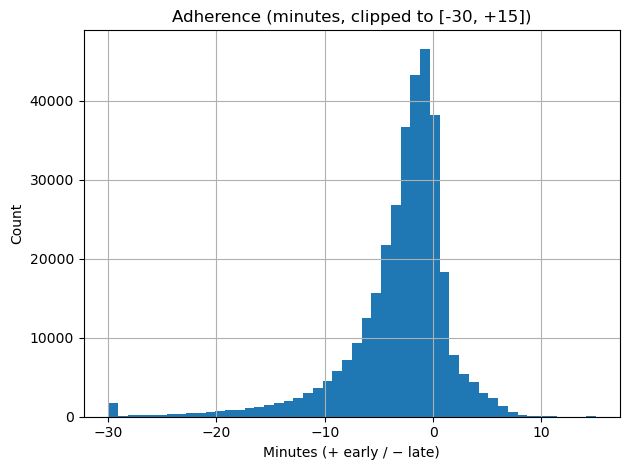

In [17]:
# Q1 — Overall OTP & Adherence Distribution (using canonical aliases)
# - What: Summarize on-time performance (OTP) and visualize the distribution of adherence.
# - Why: Establish a clear baseline of reliability and whether skew is driven by early or late departures.
# - How: Compute mean of DF_OTP['is_ontime']; show descriptive stats for ADHERENCE; plot a clipped histogram for readability.
# - Supports: Q1.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read-only working view
df = DF_OTP

# Overall OTP
overall_otp = df["is_ontime"].mean()
n_rows = len(df)
print(f"Overall OTP: {overall_otp:.1%}  (n={n_rows:,})")

# Optional: class mix to aid narrative (early/late/on-time shares)
if "otp_label" in df.columns:
    label_share = (df["otp_label"].value_counts(normalize=True)
                   .rename_axis("class")
                   .rename("share")
                   .reset_index())
    label_share["share"] = (label_share["share"]*100).round(1)
    display(label_share)

# Descriptive stats for adherence (minutes, signed: + early / - late)
# Use raw ADHERENCE if available; otherwise compute from clipped as best-effort
if "ADHERENCE" in df.columns and pd.api.types.is_numeric_dtype(df["ADHERENCE"]):
    adh_series = df["ADHERENCE"]
else:
    # Fallback: if only clipped exists, show that (rare)
    adh_series = df.get("ADHERENCE_clip", pd.Series(dtype=float))

display(adh_series.describe(percentiles=[.05, .25, .50, .75, .95]).to_frame("ADHERENCE").T)

# Histogram (clipped for readability)
if "ADHERENCE_clip" in df.columns and pd.api.types.is_numeric_dtype(df["ADHERENCE_clip"]):
    plot_series = df["ADHERENCE_clip"]
else:
    # If not precomputed, clip on the fly to match our standard view
    plot_series = adh_series.clip(lower=-30, upper=15)

plt.figure()
plot_series.hist(bins=50)
plt.title("Adherence (minutes, clipped to [-30, +15])")
plt.xlabel("Minutes (+ early / − late)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 2) How does direction of travel, route, or location affect the on-time performance?

,ROUTE_ABBR,route_name,otp,n
7,55,Murfreesboro Pike,0.753462,60157
6,52,Nolensville Pike,0.809864,49170
5,3,West End,0.811149,45099
4,56,Gallatin Pike,0.845068,58716
3,7,Hillsboro,0.863000,17000
2,50,Charlotte Pike,0.874897,42557
1,23,Dickerson Pike,0.904180,39334
0,22,Bordeaux,0.921035,23960


,ROUTE_ABBR,route_name,otp,n
0,22,Bordeaux,0.921035,23960
1,23,Dickerson Pike,0.904180,39334
2,50,Charlotte Pike,0.874897,42557
3,7,Hillsboro,0.863000,17000
4,56,Gallatin Pike,0.845068,58716
5,3,West End,0.811149,45099
6,52,Nolensville Pike,0.809864,49170
7,55,Murfreesboro Pike,0.753462,60157


,ROUTE_ABBR,route_name,ROUTE_DIRECTION_NAME,otp,n
12,55,Murfreesboro Pike,FROM DOWNTOWN,0.706118,29767
10,52,Nolensville Pike,FROM DOWNTOWN,0.743129,25289
0,3,West End,FROM DOWNTOWN,0.746255,22562
13,55,Murfreesboro Pike,TO DOWNTOWN,0.799835,30390
14,56,Gallatin Pike,FROM DOWNTOWN,0.802459,34165
2,7,Hillsboro,FROM DOWNTOWN,0.829655,8882
8,50,Charlotte Pike,FROM DOWNTOWN,0.862145,21218
1,3,West End,TO DOWNTOWN,0.876115,22537
11,52,Nolensville Pike,TO DOWNTOWN,0.880533,23881
9,50,Charlotte Pike,TO DOWNTOWN,0.887577,21339


,ROUTE_ABBR,route_name,ROUTE_DIRECTION_NAME,otp,n
5,22,Bordeaux,TO DOWNTOWN,0.944831,11057
7,23,Dickerson Pike,TO DOWNTOWN,0.919339,15745
15,56,Gallatin Pike,TO DOWNTOWN,0.904362,24551
4,22,Bordeaux,FROM DOWNTOWN,0.900643,12903
3,7,Hillsboro,TO DOWNTOWN,0.899483,8118
6,23,Dickerson Pike,FROM DOWNTOWN,0.894061,23589
9,50,Charlotte Pike,TO DOWNTOWN,0.887577,21339
11,52,Nolensville Pike,TO DOWNTOWN,0.880533,23881
1,3,West End,TO DOWNTOWN,0.876115,22537
8,50,Charlotte Pike,FROM DOWNTOWN,0.862145,21218


,ROUTE_DIRECTION_NAME,otp,n
0,FROM DOWNTOWN,0.798531,178375
1,TO DOWNTOWN,0.878370,157618


,ROUTE_ABBR,route_name,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,timepoint_name,otp_rate,n
2,55,Murfreesboro Pike,FROM DOWNTOWN,MXBELL,BELL STATION OUTBOUND,0.513230,4951
4,52,Nolensville Pike,FROM DOWNTOWN,DCSCC,EZELL PIKE CONVENIENCE CTR WB,0.550697,1578
6,3,West End,FROM DOWNTOWN,BRCJ,COLICE JEANNE RD & BAUGH RD SB,0.604136,2031
5,55,Murfreesboro Pike,FROM DOWNTOWN,MXDONEL,DONELSON/DELL STATION OUTBOUND,0.604923,4956
7,3,West End,FROM DOWNTOWN,HRWB,HARDING PIKE & BOSLEY SPRINGS RD WB,0.613498,4119
15,52,Nolensville Pike,FROM DOWNTOWN,LINWAL,LINBAR DR & WALLACE RD WB,0.630888,2208
8,55,Murfreesboro Pike,TO DOWNTOWN,MXWHARF,WHARF STATION INBOUND,0.636098,5136
9,7,Hillsboro,FROM DOWNTOWN,21BK,21ST AVE S & CAPERS AVE SB,0.647712,2972
17,55,Murfreesboro Pike,FROM DOWNTOWN,MXTHOMP,THOMPSON STATION INBOUND,0.654490,4955
14,56,Gallatin Pike,FROM DOWNTOWN,SAMS,WALMART GALLATIN PIKE,0.655080,4833


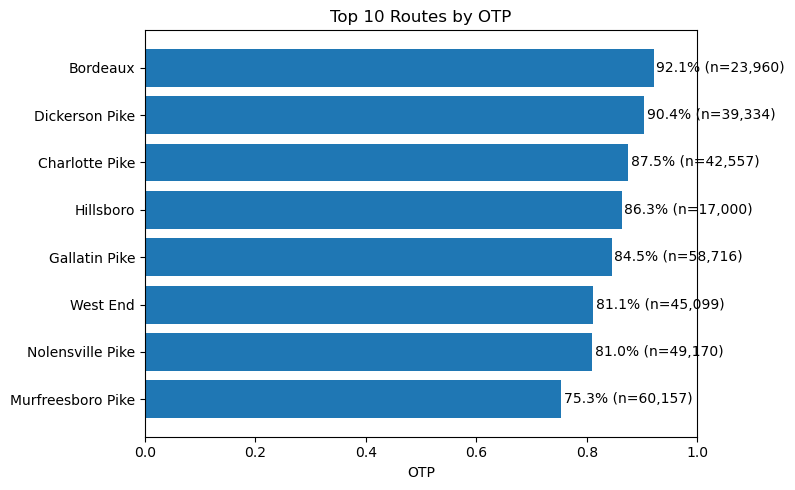

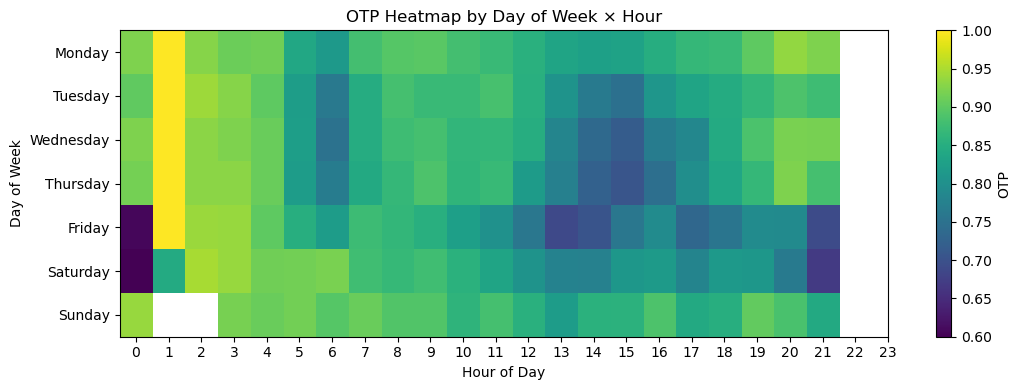

In [18]:
# Q2 — Effects of Direction, Route, and Location (using canonical aliases)
# - What: Compare OTP by route, direction, and timepoint; include a Downtown split and visuals.
# - Why: Identify corridors/timepoints driving performance and reveal directional asymmetry.
# - How: Use DF_OTP/BY_ROUTE/TP_HOT to compute tables with counts (n) and charts (Top 10 Routes, Hour×Day OTP heatmap).
# - Supports: Q2 (and informs Q9).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Working view (read-only intent) ===
df = DF_OTP.copy()

# Ensure stable dtypes & readable labels
if "ROUTE_ABBR" in df.columns:
    df["ROUTE_ABBR"] = pd.to_numeric(df["ROUTE_ABBR"], errors="coerce").astype("Int64")
if "route_name" in df.columns and "ROUTE_ABBR" in df.columns:
    df["route_name"] = df["route_name"].fillna(df["ROUTE_ABBR"].astype(str))
if "ROUTE_DIRECTION_NAME" in df.columns:
    df["ROUTE_DIRECTION_NAME"] = df["ROUTE_DIRECTION_NAME"].astype(str)
if "TIME_POINT_ABBR" in df.columns:
    df["TIME_POINT_ABBR"] = df["TIME_POINT_ABBR"].astype(str)
if "timepoint_name" in df.columns and "TIME_POINT_ABBR" in df.columns:
    df["timepoint_name"] = df["timepoint_name"].fillna(df["TIME_POINT_ABBR"])

# -----------------------------
# A) By Route (with n)
# Use the pre-aggregated BY_ROUTE (already computed from DF_OTP) for consistency.
# -----------------------------
by_route = BY_ROUTE.copy()
by_route = by_route[["ROUTE_ABBR","route_name","otp","n"]] if {"route_name","ROUTE_ABBR","otp","n"}.issubset(by_route.columns) else by_route
display(by_route.sort_values(["otp","n"]).head(10))                               # Worst 10
display(by_route.sort_values(["otp","n"], ascending=[False, False]).head(10))     # Best 10

# -----------------------------
# B) By Route + Direction (with n)
# -----------------------------
if {"ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","is_ontime"}.issubset(df.columns):
    by_route_dir = (df.groupby(["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME"], observed=True)
                      .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
                      .reset_index())
    display(by_route_dir.sort_values(["otp","n"]).head(10))                                           # Worst segments
    display(by_route_dir.sort_values(["otp","n"], ascending=[False, False]).head(10))                 # Best segments

# -----------------------------
# C) Downtown split (TO vs FROM) — add n
# -----------------------------
if {"ROUTE_DIRECTION_NAME","is_ontime"}.issubset(df.columns):
    downtown_split = (df.groupby("ROUTE_DIRECTION_NAME", observed=True)
                        .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
                        .reset_index()
                        .sort_values("otp"))
    display(downtown_split)

# -----------------------------
# D) Timepoint hotspots (location effect) with sample floor
# Prefer TP_HOT (route×dir×timepoint rollups from DF_OTP).
# -----------------------------
tp_floor = 200
if {"ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","otp_rate","n"}.issubset(TP_HOT.columns):
    tp_view = (TP_HOT.loc[TP_HOT["n"] >= tp_floor,
                          ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","otp_rate","n"]]
                    .sort_values(["otp_rate","n"]))
    # Lowest-OTP timepoints (consider highlighting these in maps later)
    display(tp_view.head(15))

# -----------------------------
# E) Top 10 Routes by OTP (bar chart with n labels)
# -----------------------------
if {"route_name","otp","n"}.issubset(by_route.columns):
    top10 = by_route.sort_values(["otp","n"], ascending=[False, False]).head(10).copy()
    plt.figure(figsize=(8,5))
    # Plot highest OTP at bottom for readability
    names_plot = top10["route_name"].astype(str).values[::-1]
    otp_plot   = top10["otp"].values[::-1]
    n_plot     = top10["n"].values[::-1]
    plt.barh(names_plot, otp_plot)
    for i, (otp_val, n_val) in enumerate(zip(otp_plot, n_plot)):
        plt.text(otp_val + 0.005, i, f"{otp_val:.1%} (n={int(n_val):,})", va="center")
    plt.xlim(0, 1)
    plt.xlabel("OTP")
    plt.title("Top 10 Routes by OTP")
    plt.tight_layout()
    plt.show()

# -----------------------------
# F) Hour × Day OTP Heatmap (ensure weekday order and y-axis readability)
# -----------------------------
if {"dow","hour","is_ontime"}.issubset(df.columns):
    heat = (df.groupby(["dow","hour"], observed=True)["is_ontime"]
              .mean().reset_index())
    # Pivot to 7×24 grid (may contain NaNs if sparse)
    pivot = heat.pivot(index="dow", columns="hour", values="is_ontime")

    # Ensure weekday order Monday → Sunday
    weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    pivot = pivot.reindex(weekday_order)

    # Fill missing cells with NaN (imshow handles), and choose bounds to start at 0.6 as requested
    plt.figure(figsize=(11,4))
    plt.imshow(pivot, aspect="auto", interpolation="nearest", vmin=0.6, vmax=1.0)
    plt.title("OTP Heatmap by Day of Week × Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.colorbar(label="OTP")
    plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)
    plt.xticks(ticks=range(24), labels=range(24))
    plt.tight_layout()
    plt.show()


### 3) How does time of day or day of week affect on-time performance?

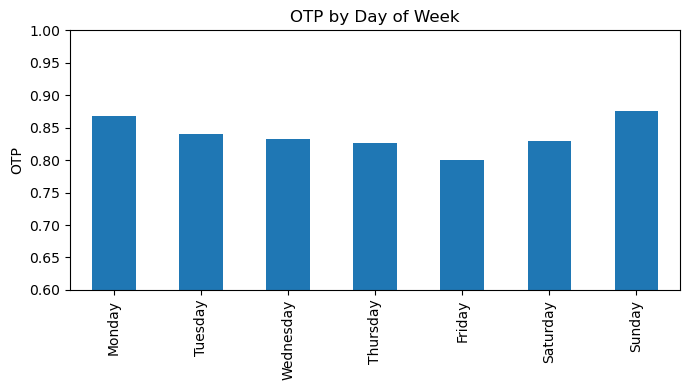

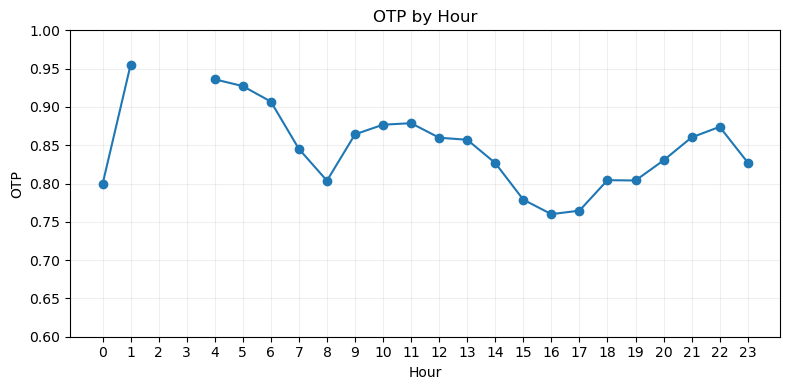

,peak,otp,n
1,Peak,0.806740,121691
0,Off-peak,0.852591,214302


In [19]:
# Q3 — Time of Day / Day of Week (using canonical aliases)
# - What: Compare OTP by hour, peak window, and day-of-week (ordered Mon→Sun).
# - Why: Reveal rush-hour and weekday/weekend patterns to inform scheduling and staffing.
# - How: Groupby DF_OTP for means; ordered bar chart for DOW; line chart for hour with y-axis starting at 0.60; include peak vs off-peak table with counts.
# - Supports: Q3.

import pandas as pd
import matplotlib.pyplot as plt

df = DF_OTP.copy()

# Ensure required features exist
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
if "dow" not in df.columns and "DATE" in df.columns:
    df["dow"] = df["DATE"].dt.day_name()
if "hour" not in df.columns and "SCHEDULED_TIME" in df.columns:
    df["hour"] = df["SCHEDULED_TIME"].dt.hour
if "peak" not in df.columns and "hour" in df.columns:
    df["peak"] = pd.Series(pd.NA, index=df.index)
    df.loc[df["hour"].between(7,9) | df["hour"].between(16,18), "peak"] = "Peak"
    df["peak"] = df["peak"].fillna("Off-peak")

# -----------------------------
# A) OTP by Day of Week (ordered Mon→Sun)
# -----------------------------
by_dow = (df.groupby("dow", observed=True)["is_ontime"]
            .mean()
            .reindex(weekday_order))

plt.figure(figsize=(7,4))
by_dow.plot(kind="bar")
plt.ylim(0.6, 1.0)
plt.title("OTP by Day of Week")
plt.ylabel("OTP")
plt.xlabel("")
plt.tight_layout()
plt.show()

# -----------------------------
# B) OTP by Hour (y-axis from 0.60)
# -----------------------------
by_hour = (df.groupby("hour", observed=True)["is_ontime"]
             .mean()
             .reindex(range(24)))  # ensure a full 0–23 axis

plt.figure(figsize=(8,4))
by_hour.plot(kind="line", marker="o")
plt.ylim(0.6, 1.0)
plt.title("OTP by Hour")
plt.ylabel("OTP")
plt.xlabel("Hour")
plt.xticks(range(0,24,1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# -----------------------------
# C) Peak vs Off-peak (with n)
# -----------------------------
by_peak = (df.groupby("peak", observed=True)
             .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
             .reset_index()
             .sort_values("otp"))
display(by_peak)
